In [ ]:
##### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

##### Ans: 

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

For example, if the minimum value of a feature was 20, and the maximum value was 40, then 30 would be transformed to about 0.5 since it is halfway between 20 and 40. The formula is as follows:
(max−min)/(value−min)
​
Min-max normalization has one fairly significant downside: it does not handle outliers very well. For example, if you have 99 values between 0 and 40, and one value is 100, then the 99 values will all be transformed to a value between 0 and 0.4. That data is just as squished as before! Take a look at the image below to see an example of this.



In [1]:
# import module
from sklearn.preprocessing import StandardScaler

# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]

# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)

# print scaled data
print(scaled_data)


[[ 0.97596444 -1.61155897]
 [-0.66776515  0.08481889]
 [-1.28416374  1.10264561]
 [ 0.97596444  0.42409446]]


In [ ]:
##### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

##### Ans: Unit Vector Scaling scales the features so that each data point has a length of 1. This technique is useful when the angle between the data points is essential.
This scaler scales each feature to have a length of 1. The formula is as follows:
z = x / ||x||
where x is the feature vector, ||x|| is the Euclidean norm of the feature vector, and z is the scaled feature vector.


###### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application

In [47]:
#### Ans:

# Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, 
# by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#Dimensionality Reduction is simply reducing the number of features (columns) while retaining maximum information. Following are reasons for Dimensionality Reduction:

# Dimensionality Reduction helps in data compression, and hence reduced storage space.
# It reduces computation time.
# It also helps remove redundant features, if any.
# Removes Correlated Features.
# Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly.
# It is helpful in noise removal also and as a result of that, we can improve the performance of models.

# Import librairies
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# Load the dataset
data = load_wine()
# Configuring pandas to show all features
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Converting data to a dataframe to view properly
data1 = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df =data1
# Printing first 5 observations
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [49]:
#Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled

### Now we are ready to apply for PCA.
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [51]:
df.shape

(178, 13)

Text(0, 0.5, 'Explained Varience')

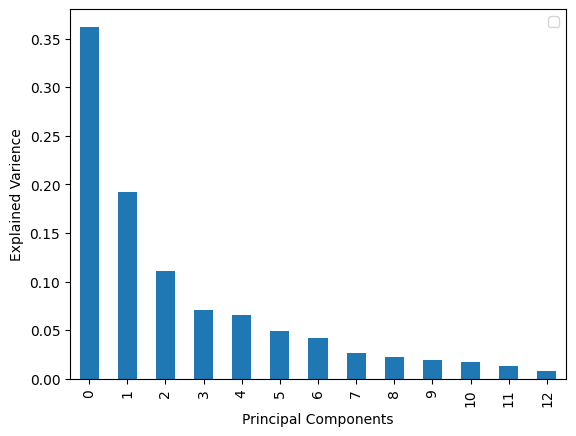

In [53]:
#### interesting to see how much variance each principal component captures.
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

# Observataion :
# The first 6 Principal Components are capturing around 80% of the variance so we can replace the 11 original features  with the new 5 features having 80% of the information. 
# So, we have reduced the 13 dimensions to only 6 dimensions while retaining most of the information.

###### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

##### Ans: Data compression: PCA can be used to reduce the dimensionality of high-dimensional datasets, making them easier to store and analyze.
Feature extraction: PCA can be used to identify the most important features in a dataset, which can be used to build predictive models.

**PCA Algorithm for Feature Extraction**

The following represents 6 steps of principal component analysis (PCA) algorithm:

1. Standardize the dataset: Standardizing / normalizing the dataset is the first step one would need to take before performing PCA. The PCA calculates a new projection of the given data set representing one or more features. The new axes are based on the standard deviation of the value of these features. So, a feature / variable with a high standard deviation will have a higher weight for the calculation of axis than a variable / feature with a low standard deviation. If the data is normalized / standardized, the standard deviation of all fetaures / variables get measured on the same scale. Thus, all variables have the same weight and PCA calculates relevant axis appropriately. Note that the data is standardized / normalized after creating training / test split. Python’s sklearn.preprocessing StandardScaler class can be used for standardizing the dataset.

2. Construct the covariance matrix: Once the data is standardized, the next step is to create n X n-dimensional covariance matrix, where n is the number of dimensions in the dataset. The covariance matrix stores the pairwise covariances between the different features.  Note that a positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions. Python‘s Numpy cov method can be used to create covariance matrix.

3. Perform Eigendecomposition of covariance matrix: The next step is to decompose the covariance matrix into its eigenvectors and eigenvalues. The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude. Numpy linalg.eig or linalg.eigh can be used for decomposing covariance matrix into eigenvectors and eigenvalues.

4. Selection of most important Eigenvectors / Eigenvalues: Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (). One can used the concepts of explained variance to select the k most important eigenvectors.

5. Projection matrix creation of important eigenvectors: Construct a projection matrix, W, from the top k eigenvectors.

6. Training / test dataset transformation: Finally, transform the d-dimensional input training and test dataset using the projection matrix to obtain the new k-dimensional feature subspace.

In [2]:

# Import librairies
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

#load dataset

data ="Placement_Data_Full_Class.csv"
df = pd.read_csv(data)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:


#
# Perform one-hot encoding
#
categorical_columns = df.columns[df.dtypes == object] # Find all categorical columns
 
df = pd.get_dummies(df, columns = categorical_columns, drop_first=True)
#
# Create training / test split
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(df[df.columns[df.columns != 'salary']],
                   df['salary'], test_size=0.25, random_state=1)
#
# Standardize the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance and select the most important eigenvectors based on explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Construct projection matrix using the five eigenvectors that correspond to the top five eigenvalues (largest), to capture about 75% of the variance in this dataset
#
egnpairs = [(np.abs(egnvalues[i]), egnvectors[:, i])
                for i in range(len(egnvalues))]
egnpairs.sort(key=lambda k: k[0], reverse=True)
projectionMatrix = np.hstack((egnpairs[0][1][:, np.newaxis],
                              egnpairs[1][1][:, np.newaxis],
                              egnpairs[2][1][:, np.newaxis],
                              egnpairs[3][1][:, np.newaxis],
                              egnpairs[4][1][:, np.newaxis]))
#
# Transform the training data set
#
X_train_pca = X_train_std.dot(projectionMatrix)

##### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In [ ]:
##### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset

##### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

In [31]:
##### Ans:

# import module
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
# compute required values
data = [[1, 5, 10, 15, 20]]
min_max.fit_transform(data)


array([[0., 0., 0., 0., 0.]])

##### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?